<a href="https://colab.research.google.com/github/nastyabekesheva/DataScience/blob/main/labs/lab_3/Income_proccessing_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
def download_data():

    #url = "https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.gz"
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    response = requests.get(url)
    if response.status_code != 200:
        raise ValueError

    with open("census-income.csv", 'wb') as file:
        for chunk in response:
            file.write(chunk)

download_data()

In [3]:
columns = '''Age.
Workclass.
Final Weight.
Education.
Education Number of Years.
Marital-status.
Occupation.
Relationship.
Race.
Sex.
Capital-gain.
Capital-loss.
Hours-per-week.
Native-country.
Income'''.replace('\n', '')
columns = columns.split('.')

In [4]:
df = pd.read_csv('census-income.csv', names=columns)
df.head()

,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        32561 non-null  int64 
 1   Workclass                  32561 non-null  object
 2   Final Weight               32561 non-null  int64 
 3   Education                  32561 non-null  object
 4   Education Number of Years  32561 non-null  int64 
 5   Marital-status             32561 non-null  object
 6   Occupation                 32561 non-null  object
 7   Relationship               32561 non-null  object
 8   Race                       32561 non-null  object
 9   Sex                        32561 non-null  object
 10  Capital-gain               32561 non-null  int64 
 11  Capital-loss               32561 non-null  int64 
 12  Hours-per-week             32561 non-null  int64 
 13  Native-country             32561 non-null  object
 14  Income

In [6]:
for i in df.columns:
  js = list(df[i].loc[df[i] == ' ?'].index)
  for j in js:
    df[i][j] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
df.isnull().values.any()

True

In [8]:
df = df.fillna(method='ffill')
df = df.fillna(method='bfill') 
df = df.fillna(0)
df.isnull().values.any()

False

In [9]:
df.describe()

,Age,Final Weight,Education Number of Years,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
def standardize(data):
  subset = data.select_dtypes('number')
  data[subset.columns] = np.divide(subset - subset.min(), data.std())
  return data
  
def min_max_normalize(data):    
  subset = data.select_dtypes('number')
  data[subset.columns] = np.divide(subset - subset.min(), subset.max() - subset.min())
  return data

In [11]:
standardize(df.copy())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,1.612852,State-gov,0.618011,Bachelors,4.664324,Never-married,Adm-clerical,Not-in-family,White,Male,0.294369,0.0,3.158552,United-States,<=50K
1,2.419278,Self-emp-not-inc,0.672913,Bachelors,4.664324,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.971862,United-States,<=50K
2,1.539541,Private,1.926680,HS-grad,3.109549,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,3.158552,United-States,<=50K
3,2.639212,Private,2.107400,11th,2.332162,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,3.158552,United-States,<=50K
4,0.806426,Private,3.089759,Bachelors,4.664324,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,3.158552,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.733115,Private,2.321336,Assoc-acdm,4.275630,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,2.996575,United-States,<=50K
32557,1.686164,Private,1.346177,HS-grad,3.109549,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,3.158552,United-States,>50K
32558,3.005770,Private,1.322833,HS-grad,3.109549,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,3.158552,United-States,<=50K
32559,0.366557,Private,1.792563,HS-grad,3.109549,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,1.538782,United-States,<=50K


In [12]:
min_max_normalize(df.copy())

,Age,Workclass,Final Weight,Education,Education Number of Years,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <a list of 10 Patch objects>)

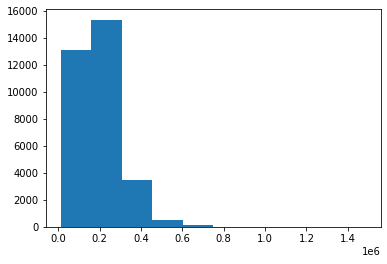

In [13]:
plt.hist(df['Final Weight'], bins=10)

Text(0, 0.5, 'Capital-gain')

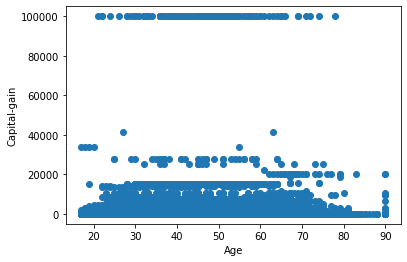

In [14]:
plt.scatter(df['Age'], df['Capital-gain'])
plt.xlabel('Age')
plt.ylabel('Capital-gain')

In [15]:
df.corr()

,Age,Final Weight,Education Number of Years,Capital-gain,Capital-loss,Hours-per-week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Final Weight,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education Number of Years,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [16]:
df.corr('spearman')

,Age,Final Weight,Education Number of Years,Capital-gain,Capital-loss,Hours-per-week
Age,1.000000,-0.078141,0.066345,0.124948,0.058484,0.142907
Final Weight,-0.078141,1.000000,-0.035706,-0.006039,-0.006914,-0.021621
Education Number of Years,0.066345,-0.035706,1.000000,0.119140,0.074749,0.167215
Capital-gain,0.124948,-0.006039,0.119140,1.000000,-0.066569,0.093322
Capital-loss,0.058484,-0.006914,0.074749,-0.066569,1.000000,0.059852
Hours-per-week,0.142907,-0.021621,0.167215,0.093322,0.059852,1.000000


In [17]:
pd.get_dummies(df.copy())

,Age,Final Weight,Education Number of Years,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


Text(0.5, 0, 'Hours-per-week')

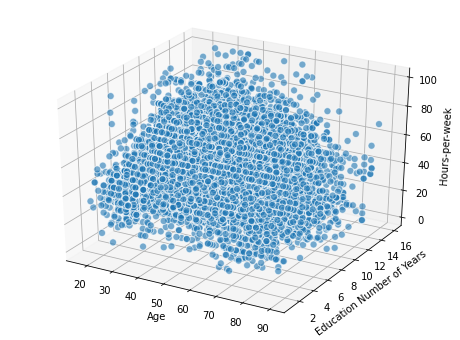

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['Age']
ys = df['Education Number of Years']
zs = df['Hours-per-week']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Education Number of Years')
ax.set_zlabel('Hours-per-week')

Text(0.5, 1.05, 'Age - Education Number of Years - Hours-per-week')

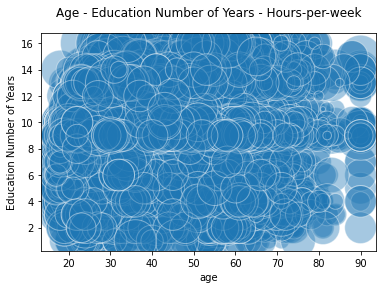

In [19]:
plt.scatter(df['Age'], df['Education Number of Years'], s=df['Hours-per-week']*25, 
            alpha=0.4, edgecolors='w')

plt.xlabel('age')
plt.ylabel('Education Number of Years')
plt.title('Age - Education Number of Years - Hours-per-week',y=1.05)

Text(0.5, 1.05, 'Age - Education Number of Years - Hours-per-week - Income')

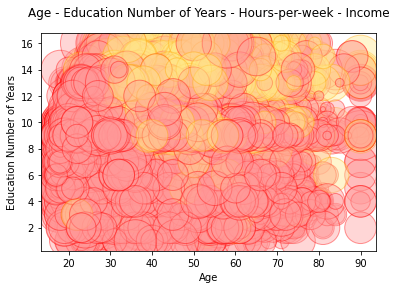

In [20]:
fill_colors = ['#FF9999' if wt==' <=50K' else '#FFE888' for wt in list(df['Income'])]
edge_colors = ['red' if wt==' <=50K' else 'orange' for wt in list(df['Income'])]

plt.scatter(df['Age'], df['Education Number of Years'], s=df['Hours-per-week']*25, 
            alpha=0.4, color=fill_colors, edgecolors=edge_colors)

plt.xlabel('Age')
plt.ylabel('Education Number of Years')
plt.title('Age - Education Number of Years - Hours-per-week - Income',y=1.05)

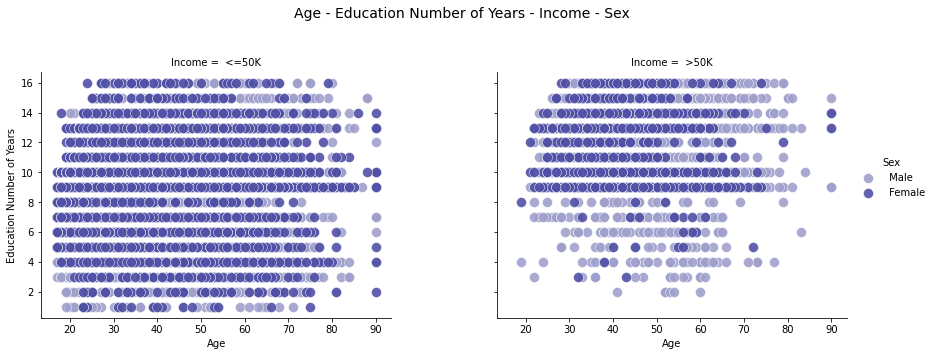

In [21]:
g = sns.FacetGrid(df, col='Income', hue='Sex', 
                  aspect=1.2, height=5, palette=sns.light_palette('navy', 4)[1:])
g.map(plt.scatter, "Age", "Education Number of Years", alpha=0.9, 
      edgecolor='white', linewidth=0.5, s=100)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Age - Education Number of Years - Income - Sex', fontsize=14)
g.add_legend(title='Sex')

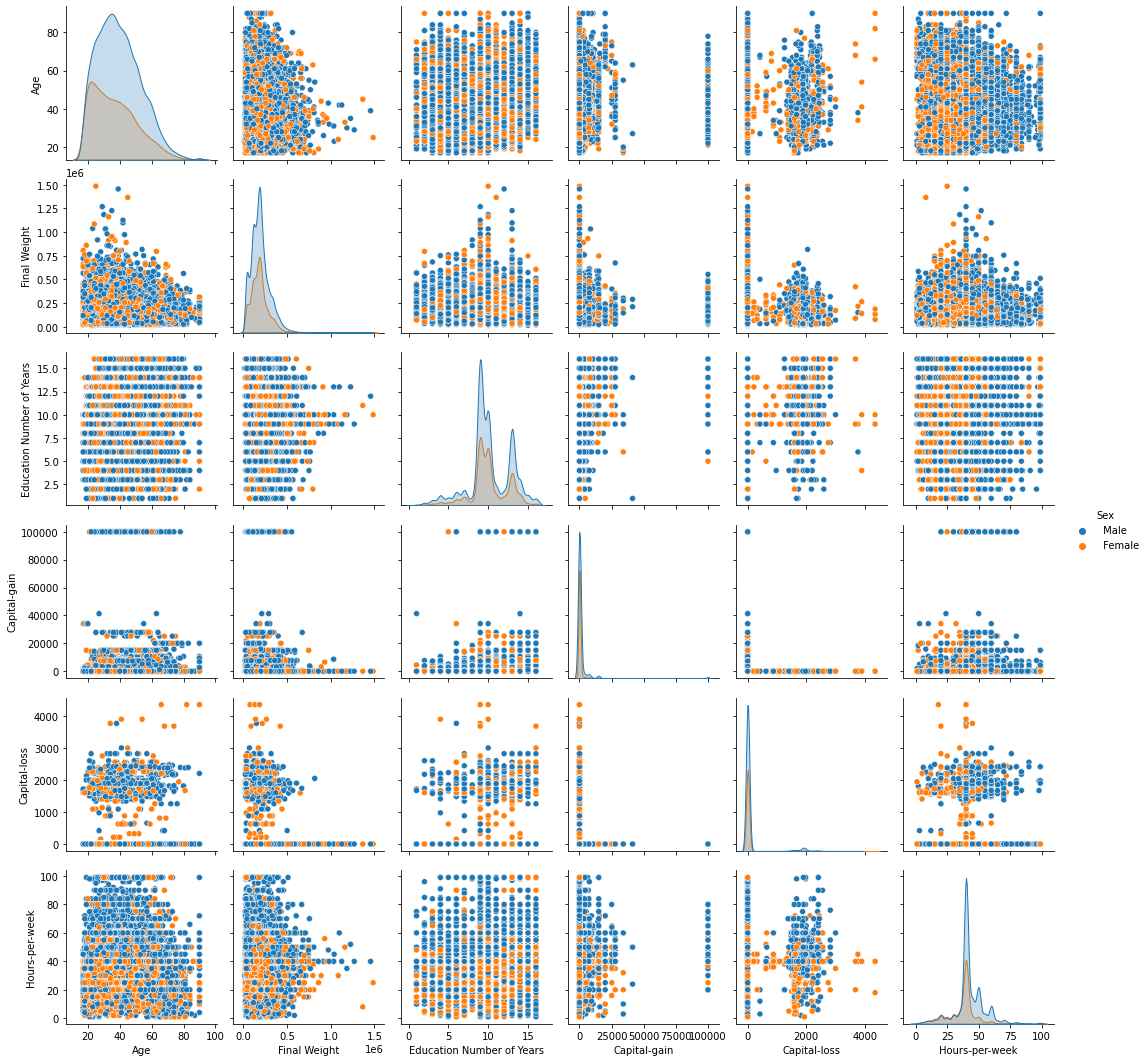

In [22]:
sns.pairplot(df,hue='Sex')